<a href="https://colab.research.google.com/github/Nelli25/Golish/blob/main/Case_Molodkina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade matplotlib > None # need refresh enviroment after installation

In [ ]:
!pip install basemap > None

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.cbook import boxplot_stats
from mpl_toolkits.basemap import Basemap

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

%matplotlib inline

# Data intro

Этот набор данных содержит показания мультисенсорной матрицы оксидов металлов, коммерческих датчиков температуры и влажности, а также наземные измерения содержания загрязняющих веществ: CO, C6H6, NOx и NO2.

In [14]:
data = pd.read_csv('AirQuality.csv', sep=';', decimal=',')
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [16]:
data.tail(116)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,NaN,NaN
9356,04/04/2005,14.00.00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028,NaN,NaN
9357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Очистка данных**

In [17]:
# Объединим дату и время, чтобы создать индекс даты и времени
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H.%M.%S', dayfirst = True)
data = data.set_index('Datetime')

# Удалим ненужные колонки
data = data.drop(['Date','Time','Unnamed: 15','Unnamed: 16'], axis = 1)

# Удалим нулевые значения в конце
data = data.dropna()
data

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Datetime,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
2005-04-04 11:00:00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
2005-04-04 12:00:00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406


In [18]:
# удаляем пропущенные и нулевые значения
import numpy as np
data = data.replace(-200,np.nan)
data.isnull().sum()

CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [19]:
data = data.interpolate(method='time')
data

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Datetime,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,3.1,1314.0,275.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
2005-04-04 11:00:00,2.4,1163.0,275.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
2005-04-04 12:00:00,2.4,1142.0,275.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406


<Axes: xlabel='Datetime'>

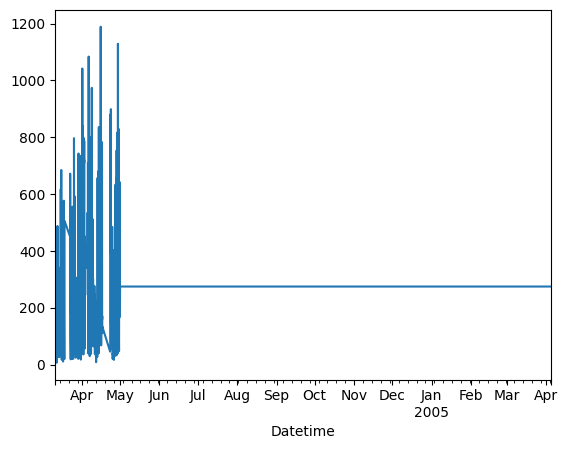

In [20]:
# Этот показатель показывает неправильные значения
data['NMHC(GT)'].plot()

<Axes: xlabel='Datetime'>

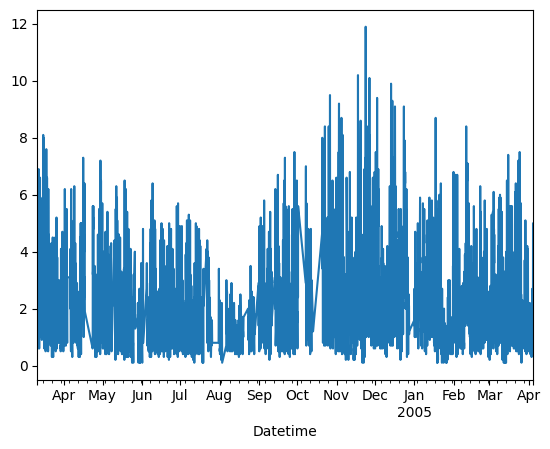

In [21]:
data['CO(GT)'].plot()

# **Корреляционная матрица**

Из корреляционной матрицы мы можем видеть корреляцию между 4 из 5 датчиков оксида металла, подтверждающую перекрестную чувствительность этой матрицы датчиков. Эти 4 датчика являются надежными индикаторами газов, связанных с качеством воздуха, и, похоже, на них не влияют температура и влажность.

Из-за разреженности точек данных NMHC(GT) он не показывает существенной корреляции с используемыми датчиками.

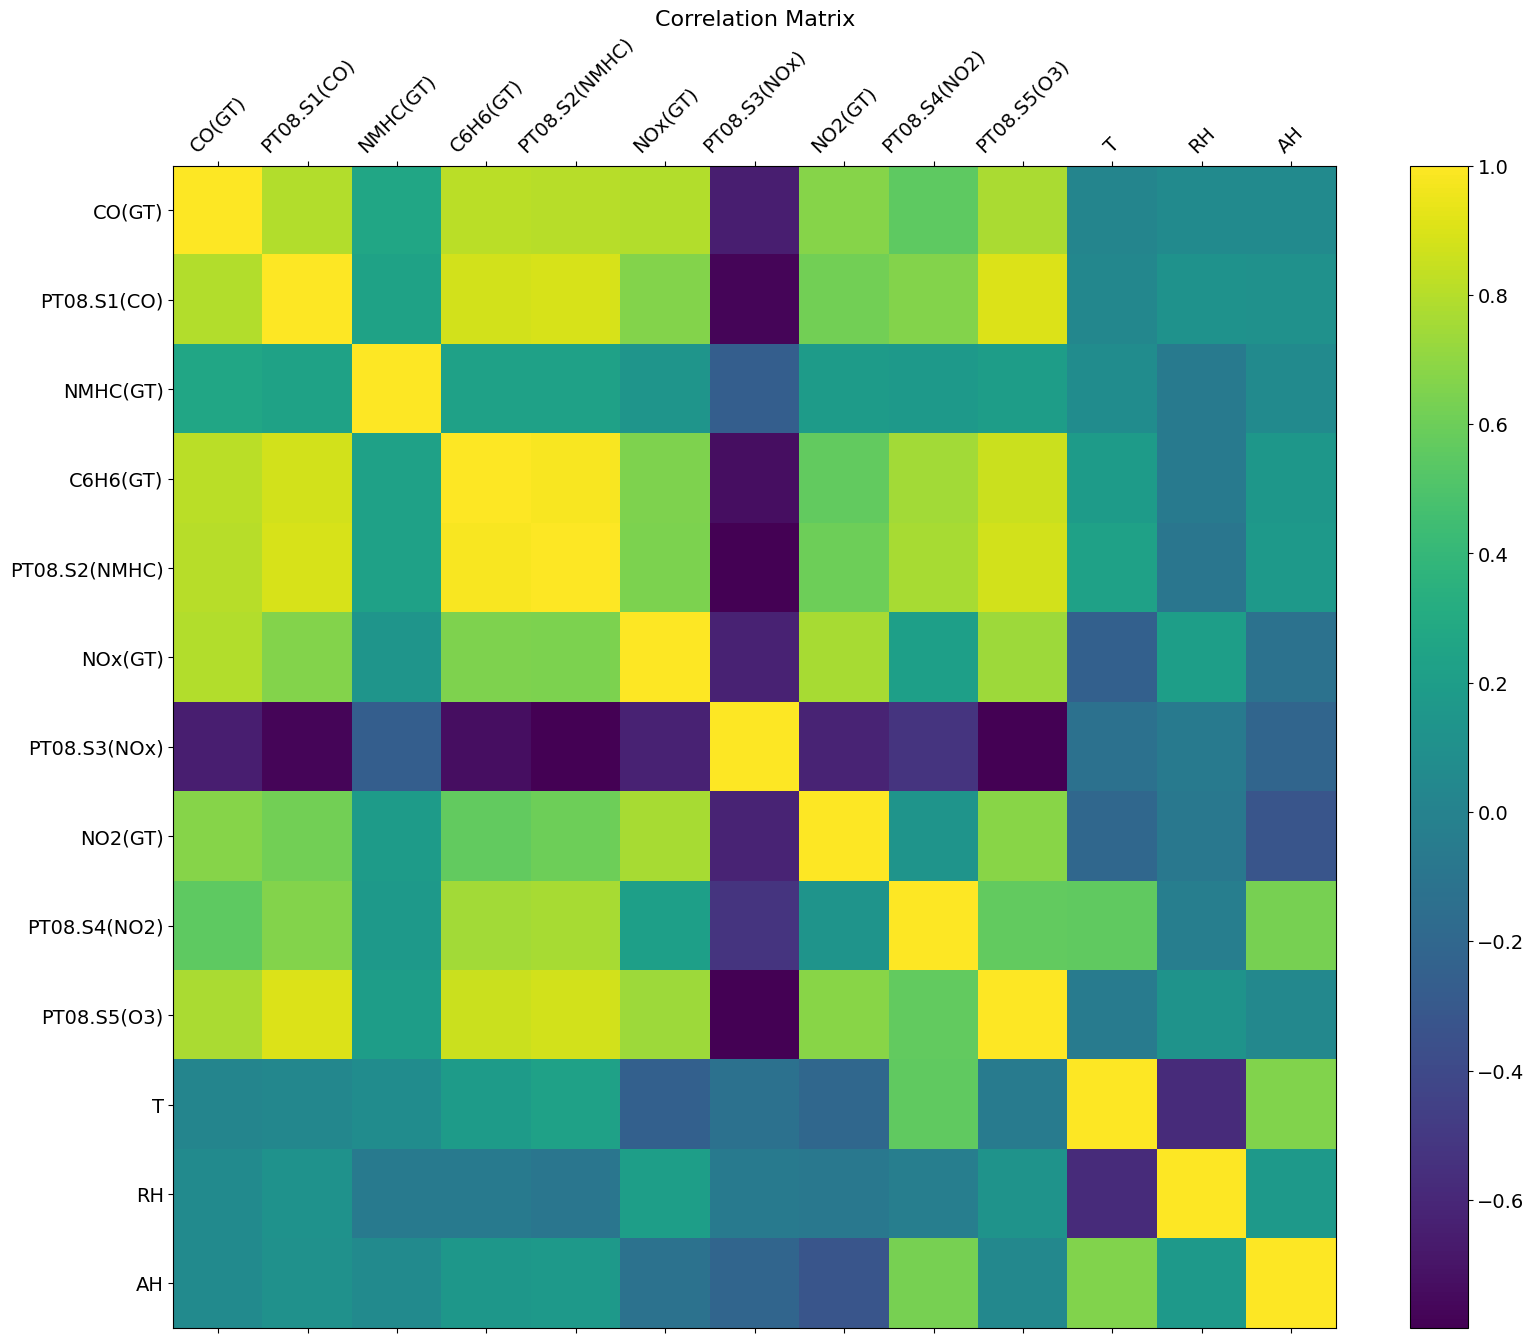

In [22]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(19, 15))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

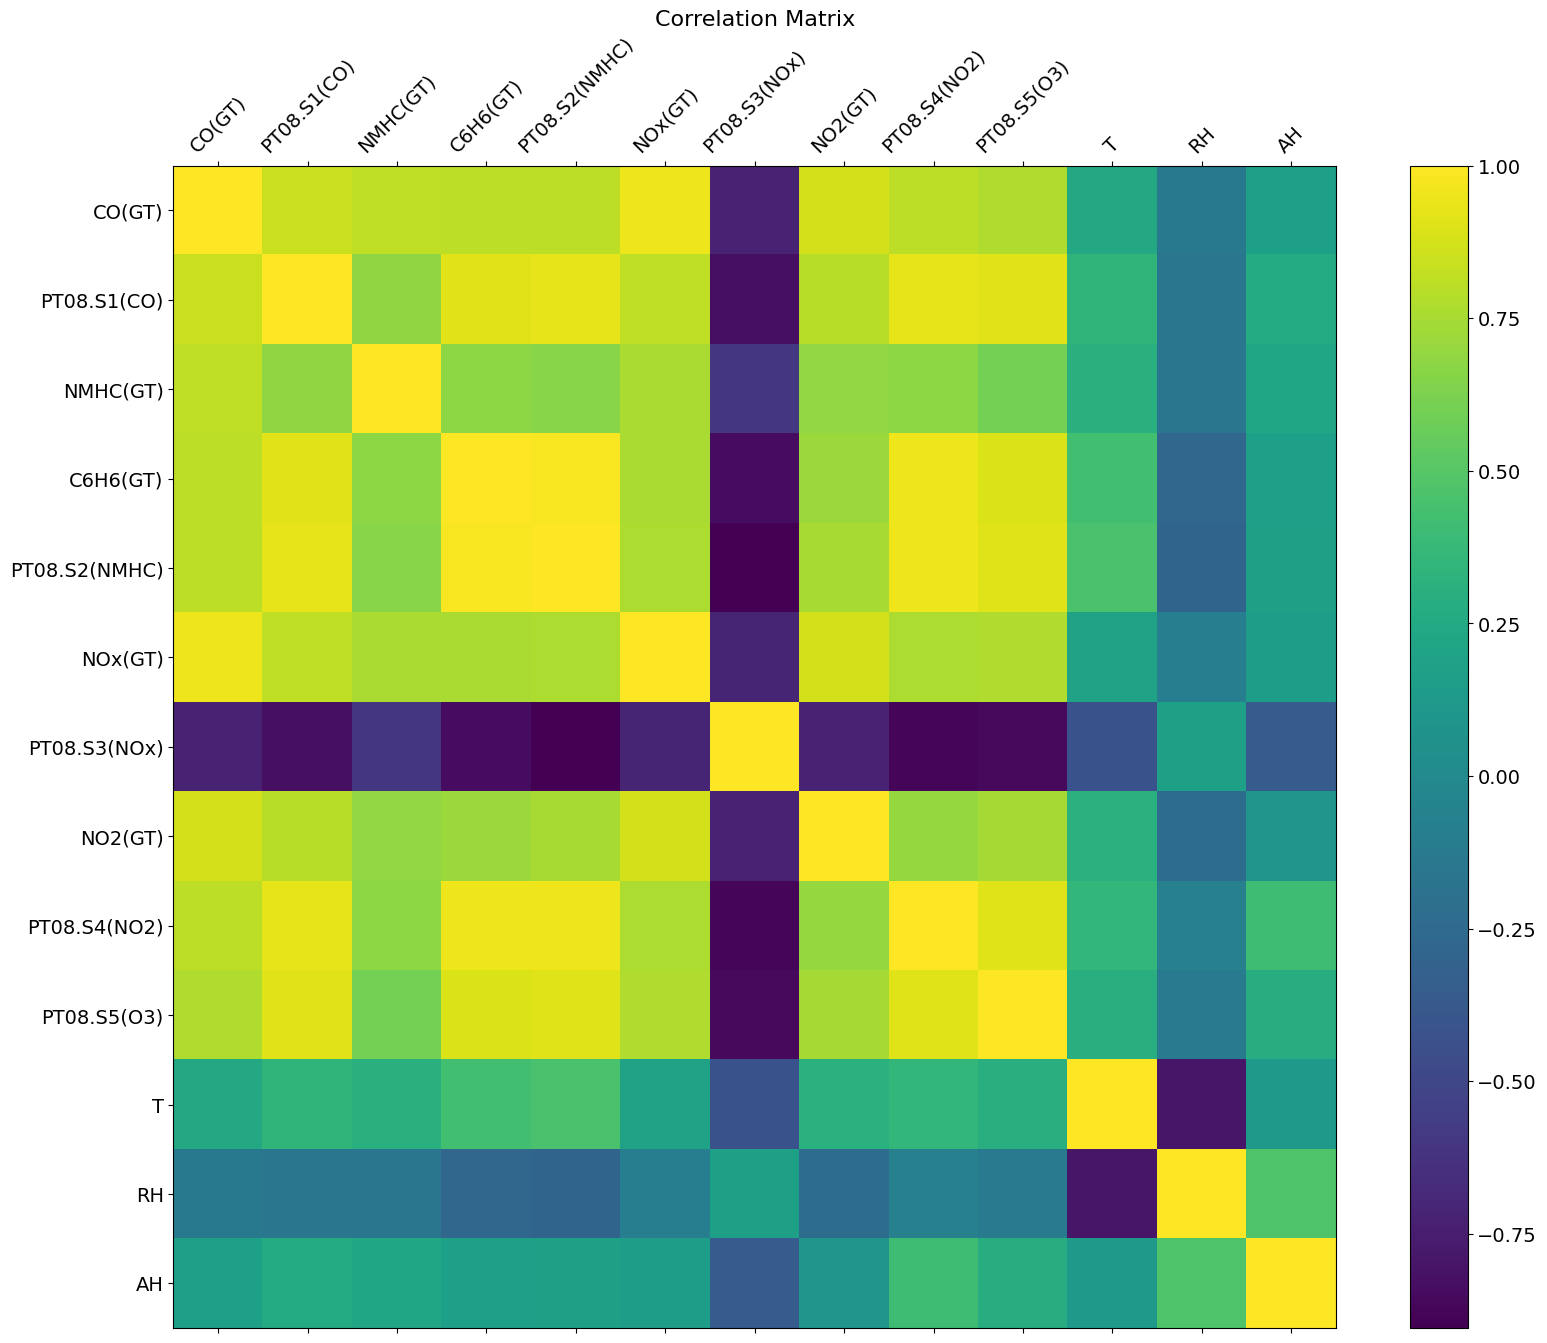

In [23]:
# Удалим показатели NMHC(GT) из наших данных
f = plt.figure(figsize=(19, 15))
plt.matshow(data[data['NMHC(GT)']!=275].corr(), fignum=f.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [24]:
data = data.drop('NMHC(GT)', axis=1)
data

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Datetime,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
2005-04-04 11:00:00,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
2005-04-04 12:00:00,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406


# Тип данных

In [29]:
data.shape

(9357, 12)

In [30]:
data.dtypes

CO(GT)           float64
PT08.S1(CO)      float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [31]:
data.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
       'AH'],
      dtype='object')

In [32]:
data.isna().sum()

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

## Numerical columns

In [33]:
num_cols = data.select_dtypes(exclude='object')
num_cols.shape

(9357, 12)

In [34]:
num_cols.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2.130603,1103.059741,10.179155,942.142620,241.922197,832.758897,109.632094,1453.298814,1032.544298,18.233408,49.191386,1.019621
std,1.431736,218.196346,7.503812,267.866611,204.315075,255.709833,46.462311,343.206131,404.447613,8.781791,17.194506,0.402203
min,0.100000,647.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.100000,938.000000,4.500000,736.000000,96.000000,654.000000,76.000000,1227.000000,733.000000,11.700000,35.800000,0.732300
50%,1.800000,1067.000000,8.300000,910.012987,180.000000,804.000000,104.917526,1460.000000,970.000000,17.600000,49.600000,0.989500
75%,2.900000,1239.000000,14.100000,1119.000000,326.000000,968.000000,136.314685,1668.000000,1293.000000,24.300000,62.300000,1.306700
max,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


## Categorical columns

In [35]:
cat_cols = data.select_dtypes(include='object')
cat_cols.head()

""
Datetime
2004-03-10 18:00:00
2004-03-10 19:00:00
2004-03-10 20:00:00
2004-03-10 21:00:00
2004-03-10 22:00:00


In [36]:
cat_cols.shape

(9357, 0)

In [ ]:
cat_cols.describe()

### Try label encoding

In [ ]:
if 1:
    le = LabelEncoder()
    for c in cat_cols.columns:
        df[c] = le.fit_transform(cat_cols[c])
    df.head()

In [ ]:
df_class = df['Tectonic_regime']

## Scatterplots with targets

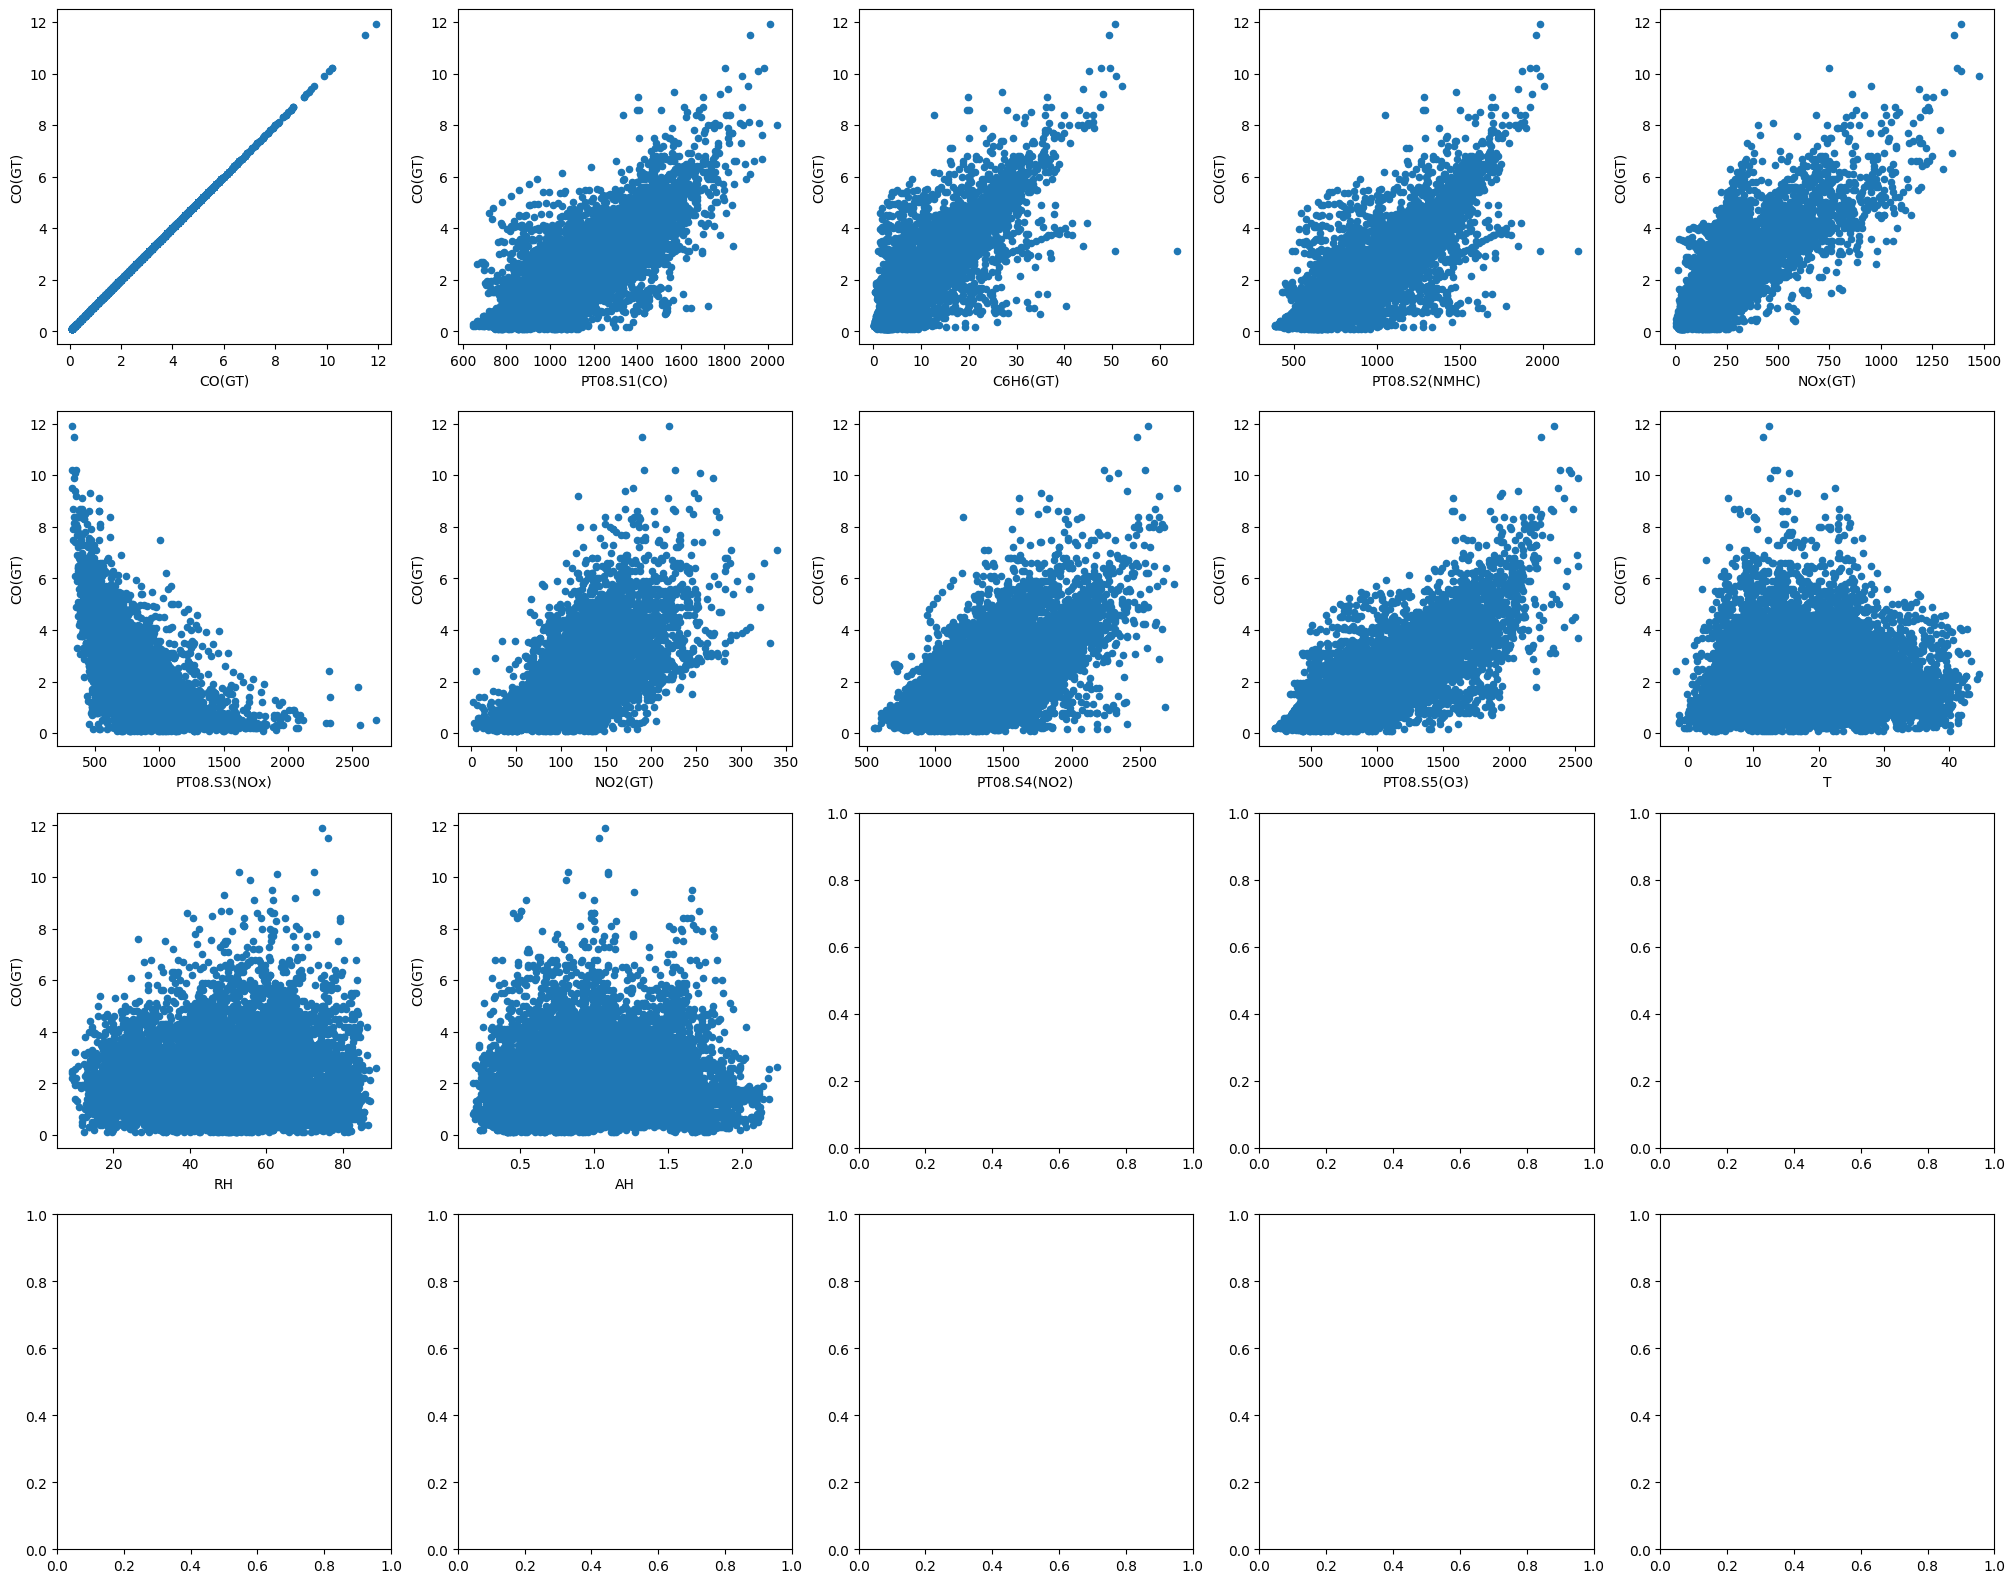

In [26]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(25, 20))
for idx, feature in enumerate(data.columns):
    data.plot(feature, "CO(GT)", subplots=True, kind="scatter", ax=axes[idx // 5, idx % 5])

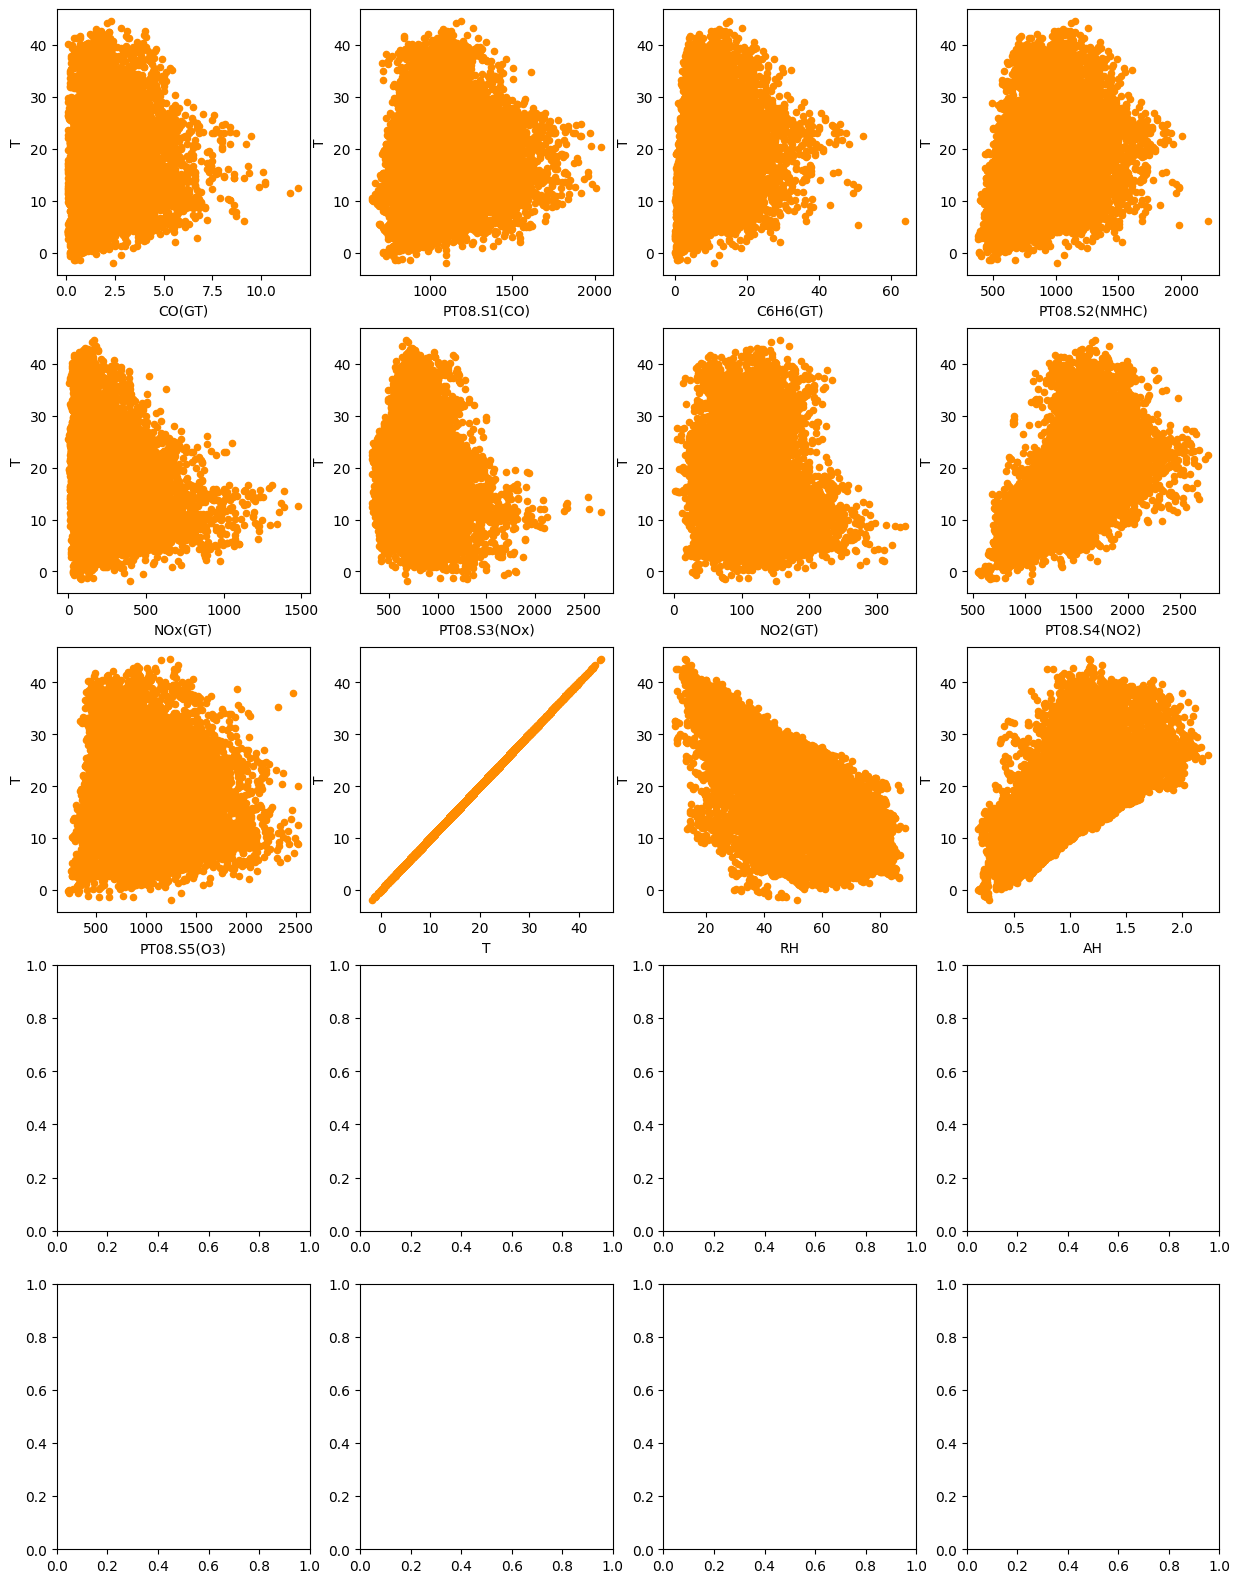

In [27]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 20))
for idx, feature in enumerate(data.columns):
    data.plot(feature, "T", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4], color='darkorange')

## Outliers

In [38]:
num_cols = data.select_dtypes(exclude='object')
num_cols.columns[2:]

Index(['C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)',
       'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

IndexError: index 2 is out of bounds for axis 1 with size 2

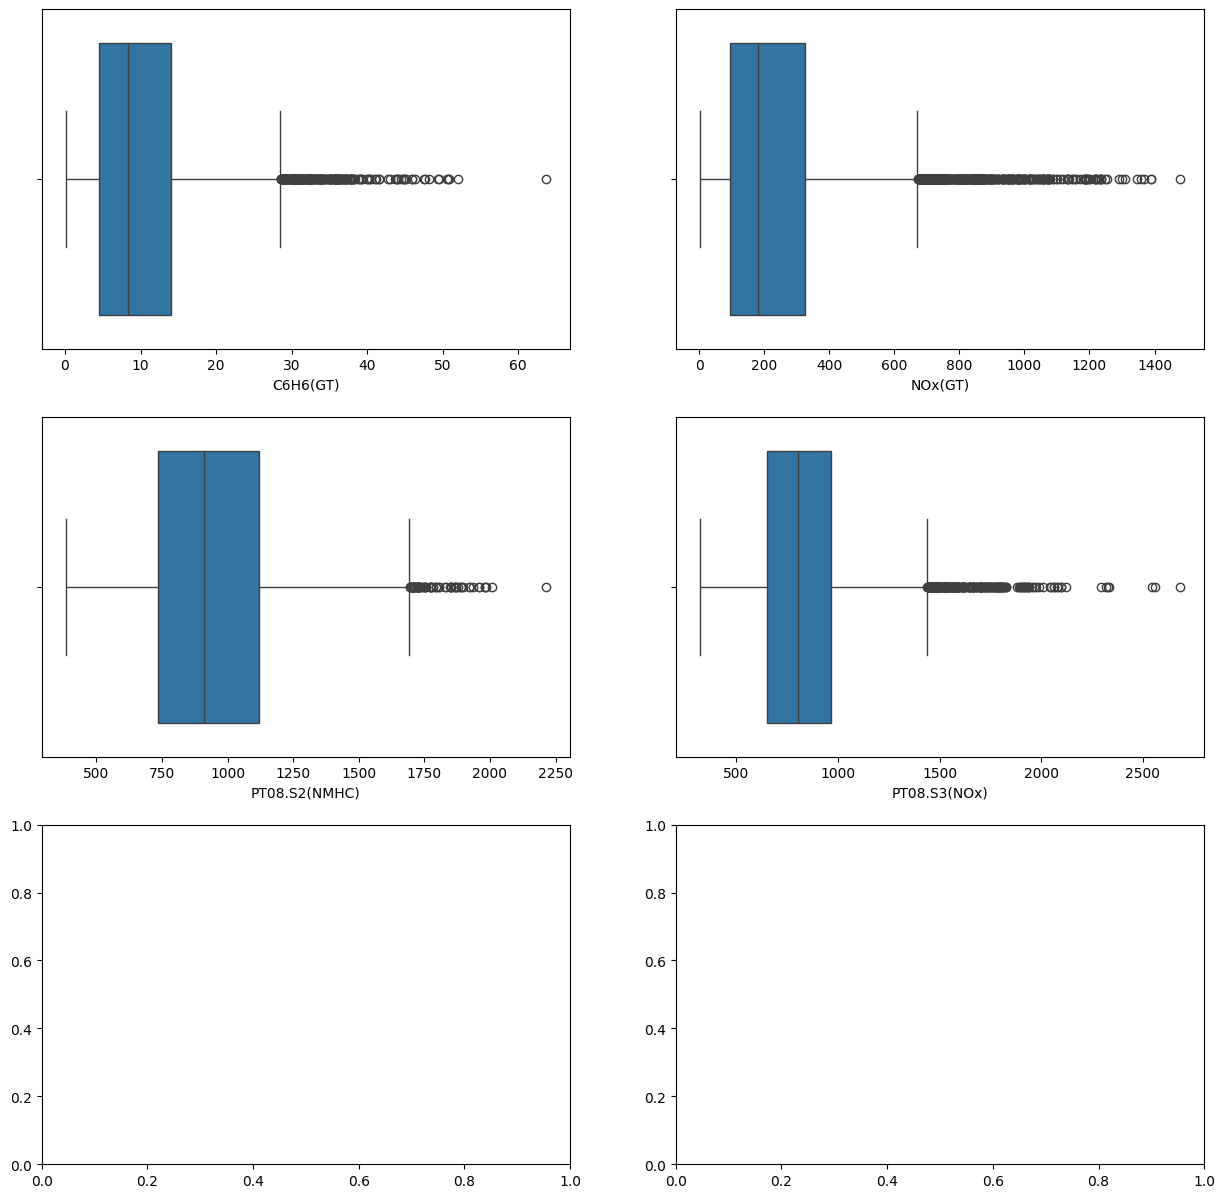

In [42]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
count = 0
for idx, feature in enumerate(num_cols.columns[2:]):
    sns.boxplot(x=data[feature], ax=axes[count % 2, count // 2])
    count += 1

In [41]:
for col in num_cols.columns[3:]:
    print(f'Outliers for {col} column: {boxplot_stats(data[col]).pop(0)["fliers"]}\n')

Outliers for PT08.S2(NMHC) column: [1701.         1754.         1696.         1737.         1776.
 1716.         1748.         1701.         1706.         1729.33333333
 1752.66666667 1776.         1705.         1713.         1795.
 1706.         1756.         1805.         1866.         1782.
 1805.         1852.         1711.         1709.         1697.
 1745.         1726.         1728.         1846.         1770.
 1771.         1897.         1862.         1793.         1890.
 2007.         1699.         1727.         1728.         1853.
 1869.         1935.         1889.         1920.         1727.
 1871.         1829.         1924.         1981.         2214.
 1735.         1720.         1959.         1980.         1958.
 1877.         1723.         1721.         1851.         1699.
 1983.         1831.         1712.         1731.        ]

Outliers for NOx(GT) column: [ 728.          891.          737.          681.          699.
  738.          701.          684.          803.  

## Distibutions of num features

In [44]:
data.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
       'AH'],
      dtype='object')

KeyError: 'CO(GT)_(PT08.S4(NO2))'

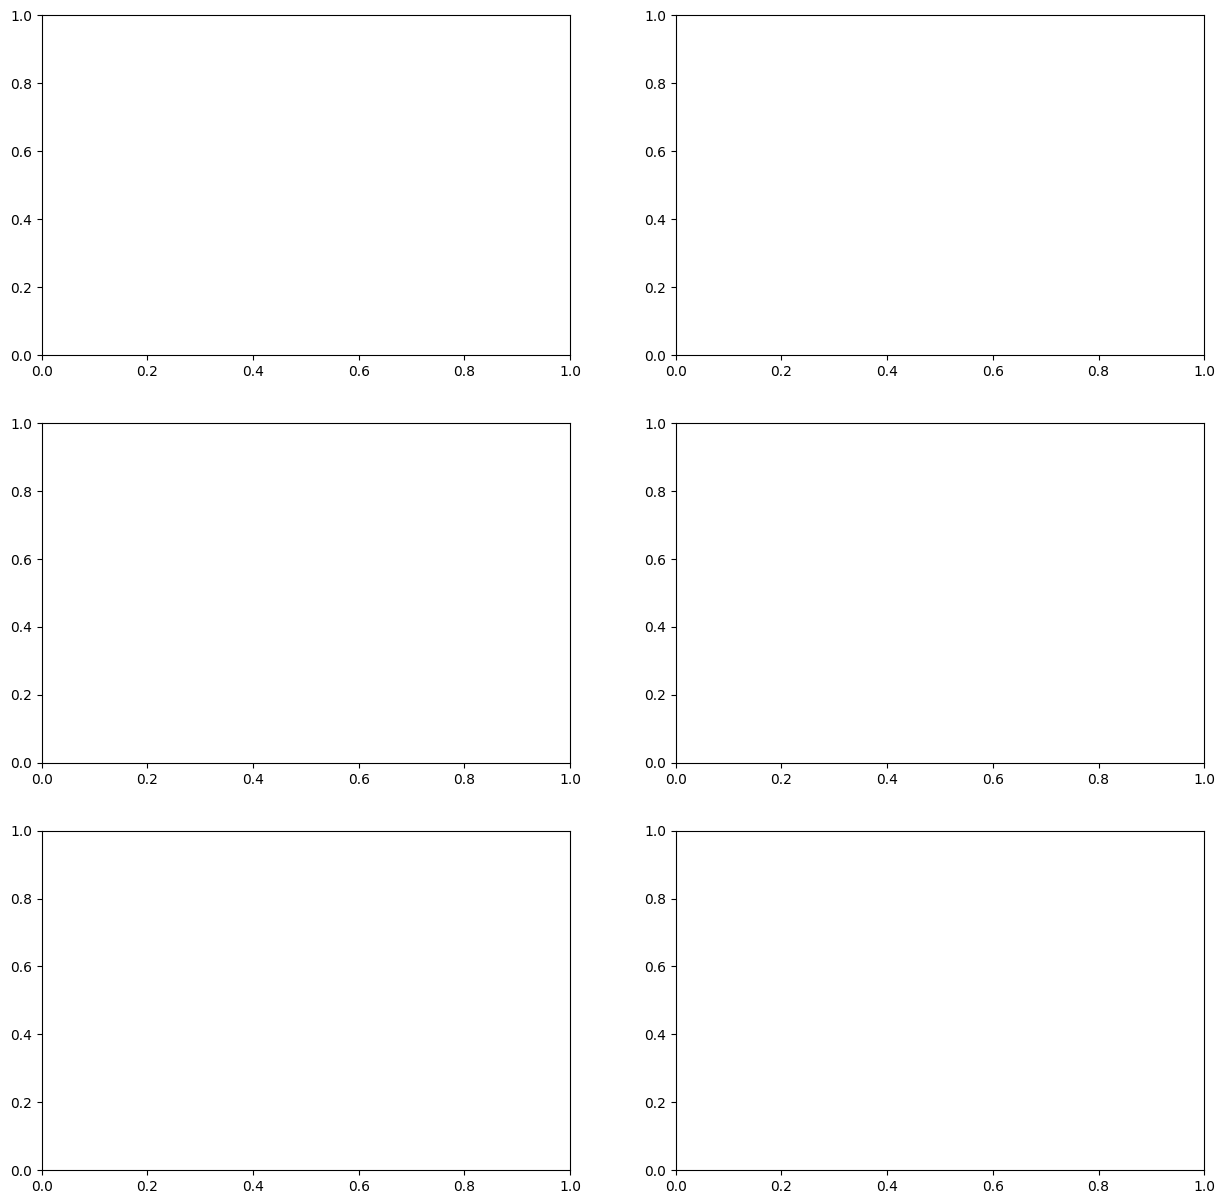

In [45]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
sns.distplot(data['CO(GT)_(PT08.S4(NO2))'], bins=50, color='r', ax=axes[0, 0])
sns.distplot(data['PT08.S1(CO)_(NOx(GT))'], bins=50, color='g', ax=axes[0, 1])
sns.distplot(data['PT08.S1(CO)_(PT08.S5(O3))'], bins=50, color='b', ax=axes[1, 0])
sns.distplot(data['C6H6(GT)_(PT08.S3(NOx))'], bins=50, color='m', ax=axes[1, 1])
sns.distplot(data['PT08.S2(NMHC)_(CO(GT))'], bins=50, color='y', ax=axes[2, 0])

###Strange porosity case

In [ ]:
data[data['Porosity_(matrix_average_%)'] > 50]

,num,Field_name,Reservoir_unit,Country,Region,Basin_name,Tectonic_regime,Latitude,Longitude,Operator_company,...,Hydrocarbon_type_(main),Reservoir_status_(current),Structural_setting,Depth_(top_reservoir_ft_TVD),Reservoir_period,Lithology_(main),Thickness_(gross_average_ft),Thickness_(net_pay_average_ft),Porosity_(matrix_average_%),Permeability_(air_average_mD)
401,861,SOUTH BELRIDGE,BELRIDGE DIATOMITE (MONTEREY-ETCHEGOIN),USA,NORTH AMERICA,SAN JOAQUIN,COMPRESSION,35.4368,-119.6788,NUMEROUS,...,OIL,PLATEAU PRODUCTION,THRUST,600,NEOGENE,DIATOMITE,1000.0,900.0,55.0,1.5


## Correlation matrix

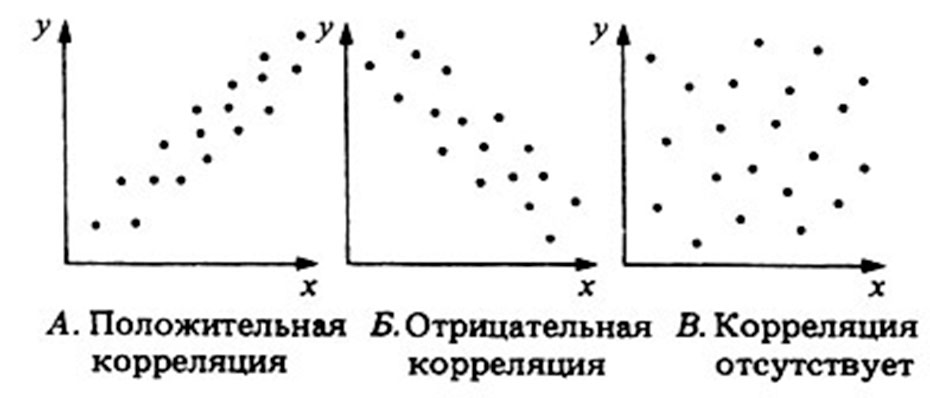

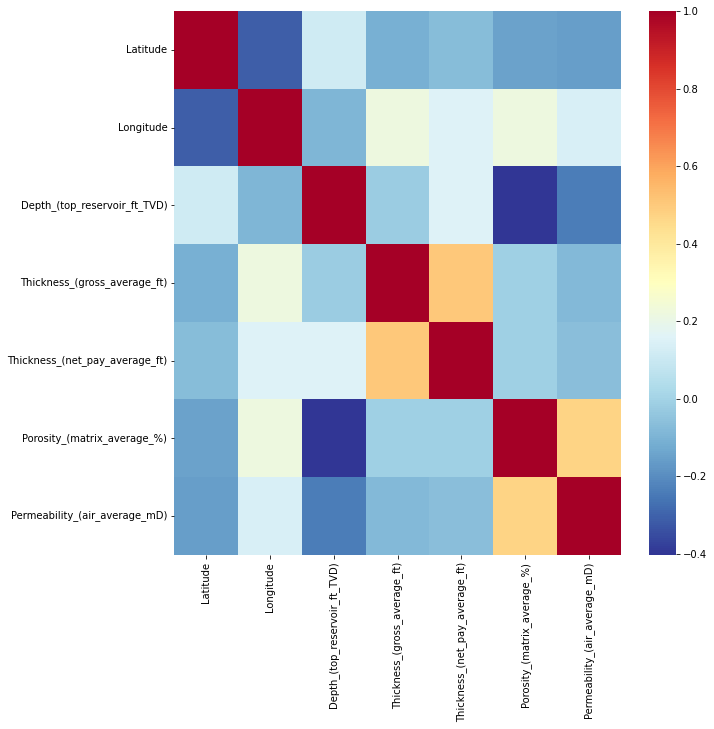

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(num_cols.corr(), cmap="RdYlBu_r");

## PCA(n_components=3)

In [46]:
num_cols.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Datetime,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [47]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(num_cols)
data_scaled[:5]

array([[ 0.32786931,  1.17762737,  0.22934175,  0.38774123, -0.37161357,
         0.87307175,  0.07249072,  0.69554102,  0.58219724, -0.52764358,
        -0.01694737, -0.65100169],
       [-0.09122473,  0.8659648 , -0.10384006,  0.04800175, -0.67997734,
         1.33455696, -0.37951267,  0.3079981 , -0.14970427, -0.561807  ,
        -0.08674084, -0.73131371],
       [ 0.04847328,  1.37012484, -0.15714916, -0.01173266, -0.54292678,
         1.20158665,  0.09401469,  0.29634267,  0.10250504, -0.7212363 ,
         0.27967485, -0.66989864],
       [ 0.04847328,  1.25095974, -0.13049461,  0.02186795, -0.34224559,
         1.01386385,  0.26620646,  0.38084451,  0.42147563, -0.82372656,
         0.62864218, -0.57914357],
       [-0.37062075,  0.77429934, -0.49033097, -0.39627295, -0.54292678,
         1.4557946 ,  0.13706263,  0.10694199,  0.19152008, -0.80095095,
         0.60537769, -0.57392205]])

In [48]:
data_scaled.shape

(9357, 12)

In [49]:
model = PCA(n_components=3)
model.fit(data_scaled)
data_pca_3 = model.transform(data_scaled)

In [50]:
def draw_3d(data):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, projection='3d')

    for f in data:
        ax.scatter(f[0], f[1], f[2], c='b')
    plt.show()

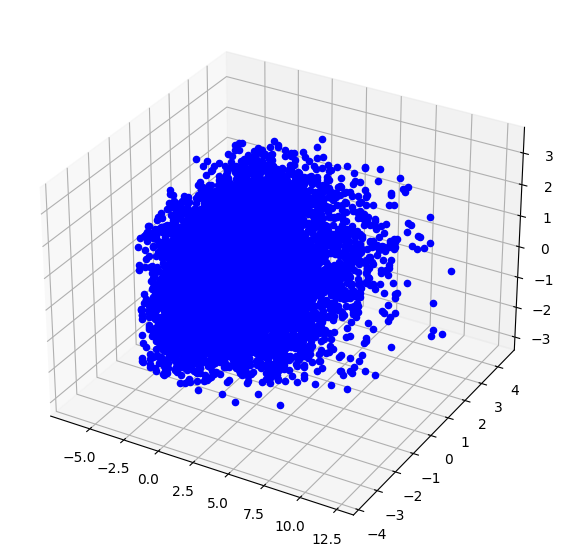

In [51]:
draw_3d(data_pca_3)

There are some distant points

## Class visualizations with PCA

In [2]:
model = PCA(n_components=2)
model.fit(data_scaled)
pca_coords = model.transform(data_scaled)
pca_coords[:5]

NameError: name 'PCA' is not defined

In [ ]:
data_to_draw = pd.DataFrame({
    'class': df_class,
    'pca1': pca_coords[:, 0],
    'pca2': pca_coords[:, 1],
})
colors = ['b', 'r', 'k', 'g', 'c', 'm', 'y', 'gold', 'darkorange', 'lime']

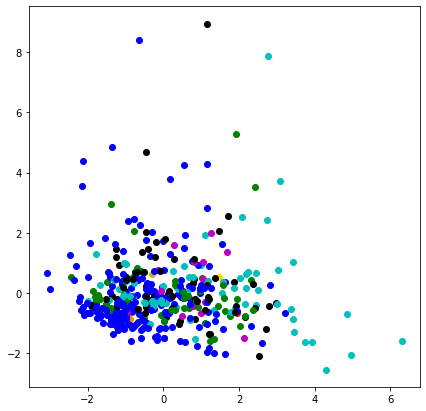

In [ ]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

for f in df_to_draw.iterrows():
    ax.scatter(f[1]['pca1'], f[1]['pca2'], c=colors[int(f[1]['class'])])

plt.show()

3D

In [ ]:
model = PCA(n_components=3)
model.fit(df_scaled)
pca_coords = model.transform(df_scaled)
pca_coords[:5]

array([[ 0.62254731, -0.04291578,  0.51594456],
       [-0.99525463,  0.53037587,  1.05948562],
       [-0.04849637, -0.2217363 ,  0.73288092],
       [-0.14946202,  0.7595916 ,  0.37956724],
       [ 0.67157496, -0.16222469,  0.72337851]])

In [ ]:
# %matplotlib notebook
# from mpl_toolkits.mplot3d import axes3d

In [ ]:
df_to_draw = pd.DataFrame({
    'class': df_class,
    'pca1': pca_coords[:, 0],
    'pca2': pca_coords[:, 1],
    'pca3': pca_coords[:, 2],
})
colors = ['b', 'r', 'k', 'g', 'c', 'm', 'y', 'gold', 'darkorange', 'lime']

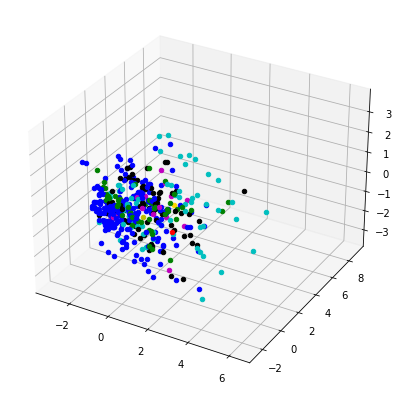

In [ ]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

for f in df_to_draw.iterrows():
    ax.scatter(f[1]['pca1'], f[1]['pca2'], f[1]['pca3'], c=colors[int(f[1]['class'])])
plt.show()